# Collaborative Filtering: User Based Recommendations

In [1]:
import pandas as pd

In [2]:
import numpy as np

### Load Movies Data

In [3]:
movies = pd.read_csv('movie_genres_final.csv')

In [4]:
movies.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,The Shawshank Redemption,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movies.shape

(1682, 24)

In [6]:
movies.columns

Index(['movie_id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [7]:
movies = movies[['movie_id', 'movie title']]

In [8]:
movies.head()

,movie_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,The Shawshank Redemption
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
movies.shape

(1682, 2)

## Load Ratings Data

In [10]:
ratings = pd.read_csv('ratings.csv')

In [11]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
ratings.shape

(100000, 4)

In [13]:
ratings.drop(['unix_timestamp'], axis=1, inplace=True)

In [14]:
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [15]:
ratings.describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [16]:
n_users = ratings.user_id.nunique()

n_items = ratings.movie_id.nunique()

In [17]:
n_users

943

In [18]:
n_items

1682

## Dividing the dataset into train and test

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [20]:
print(train.shape)
print(test.shape)

(70000, 3)
(30000, 3)


In [21]:
ratings.shape

(100000, 3)

In [22]:
train.head()

,user_id,movie_id,rating
68796,429,200,3
1933,29,332,4
95396,901,211,4
75818,593,405,3
19356,453,246,5


In [23]:
test.head()

,user_id,movie_id,rating
25988,378,496,3
56260,186,820,2
44918,588,781,2
73041,761,275,4
11692,76,960,3


## Create empty data matrix: user*movie

In [24]:
data_matrix = np.zeros((n_users, n_items))


In [25]:
data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
data_matrix.shape   

(943, 1682)

## Fill user*movie Train matrix with rating values

In [27]:
for line in train.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]


In [28]:
data_matrix

array([[0., 3., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [30]:
data_matrix.shape

(943, 1682)

## Create Data Matrix with Test Data

In [31]:
data_matrix_test = np.zeros((n_users, n_items))

In [32]:
data_matrix_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
for line in test.itertuples():
    data_matrix_test[line[1]-1, line[2]-1] = line[3]

In [34]:
data_matrix_test.shape

(943, 1682)

In [35]:
data_matrix_test

array([[5., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Create Data Matrix with full data

In [37]:
data_matrix_full = np.zeros((n_users, n_items))


In [38]:
for line in ratings.itertuples():
    data_matrix_full[line[1]-1, line[2]-1] = line[3]


In [39]:
data_matrix_full

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [40]:
data_matrix_full.shape

(943, 1682)

# Pairwise Distance

In [41]:
from sklearn.metrics.pairwise import pairwise_distances 

In [42]:

user_similarity = 1- pairwise_distances(data_matrix, metric='cosine')


In [43]:
user_similarity

array([[1.        , 0.09148626, 0.00635462, ..., 0.09022171, 0.14281216,
        0.2873638 ],
       [0.09148626, 1.        , 0.04769444, ..., 0.08312922, 0.12820962,
        0.09161472],
       [0.00635462, 0.04769444, 1.        , ..., 0.03055483, 0.08078487,
        0.        ],
       ...,
       [0.09022171, 0.08312922, 0.03055483, ..., 1.        , 0.08995831,
        0.12271921],
       [0.14281216, 0.12820962, 0.08078487, ..., 0.08995831, 1.        ,
        0.1642334 ],
       [0.2873638 , 0.09161472, 0.        , ..., 0.12271921, 0.1642334 ,
        1.        ]])

In [44]:
user_similarity.shape

(943, 943)

In [47]:
data_matrix.shape

(943, 1682)

In [45]:
data_matrix.T

array([[0., 4., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
data_matrix.T.shape

(1682, 943)

## Movies pairwise similarity distance

In [48]:
item_similarity = 1-pairwise_distances(data_matrix.T, metric='cosine')

In [49]:
item_similarity

array([[1.        , 0.26059722, 0.20639028, ..., 0.        , 0.        ,
        0.05646699],
       [0.26059722, 1.        , 0.15588599, ..., 0.        , 0.        ,
        0.09184152],
       [0.20639028, 0.15588599, 1.        , ..., 0.        , 0.        ,
        0.11572751],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.05646699, 0.09184152, 0.11572751, ..., 0.        , 0.        ,
        1.        ]])

In [50]:
item_similarity.shape

(1682, 1682)

## Dot product of Data Matrix with similarity matrix

In [51]:
item_prediction = np.dot(user_similarity, data_matrix_test)

In [52]:
item_prediction

array([[115.4914122 ,  35.10515846,  22.91211018, ...,   0.        ,
          0.94057039,   0.        ],
       [ 73.7527643 ,  15.29083028,  11.89784905, ...,   0.        ,
          0.41068318,   0.        ],
       [ 28.7384985 ,   6.78198001,   4.745609  , ...,   0.        ,
          0.26058737,   0.        ],
       ...,
       [ 69.47986613,  12.23076401,   9.25426779, ...,   0.        ,
          0.41005349,   0.        ],
       [ 75.2248144 ,  20.56954557,  11.40065483, ...,   0.        ,
          0.60628368,   0.        ],
       [105.166655  ,  34.15296187,  19.72145208, ...,   0.        ,
          1.12177594,   0.        ]])

In [53]:
item_prediction.shape

(943, 1682)

In [54]:
prediction_df = pd.DataFrame(item_prediction)

In [55]:
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,115.491412,35.105158,22.912110,56.221213,16.278129,10.554989,103.887714,62.738227,66.306938,34.090230,...,0.0,0.861579,0.0,0.0,0.0,0.0,0.0,0.0,0.940570,0.0
1,73.752764,15.290830,11.897849,25.898152,7.425375,3.375928,70.838939,30.204968,56.441903,19.727097,...,0.0,0.162145,0.0,0.0,0.0,0.0,0.0,0.0,0.410683,0.0
2,28.738498,6.781980,4.745609,10.482964,4.772594,1.175917,24.175527,11.224088,21.857049,7.032099,...,0.0,0.096273,0.0,0.0,0.0,0.0,0.0,0.0,0.260587,0.0
3,42.468076,9.888666,5.729946,15.339814,5.551546,1.434959,34.412207,16.362609,26.902871,8.470336,...,0.0,0.345312,0.0,0.0,0.0,0.0,0.0,0.0,0.254328,0.0
4,101.035410,34.532779,16.658801,49.461321,14.751983,5.544494,89.735865,56.419328,50.539925,26.966412,...,0.0,0.997951,0.0,0.0,0.0,0.0,0.0,0.0,0.765834,0.0


In [57]:
prediction_df.shape

(943, 1682)

## Get recommended movies for user 117

In [58]:
prediction_df.iloc[117]

0       64.571594
1       20.945403
2       12.654755
3       35.717007
4       12.796215
          ...    
1677     0.000000
1678     0.000000
1679     0.000000
1680     0.648160
1681     0.000000
Name: 117, Length: 1682, dtype: float64

In [59]:
prediction_df.iloc[117].sort_values(ascending=False)[:10]

49     99.102508
99     93.800499
97     88.091699
180    86.148372
173    80.003919
55     74.792302
126    69.090818
6      68.430103
182    67.370384
171    65.797124
Name: 117, dtype: float64

In [60]:
recommended_movie_df = pd.DataFrame(prediction_df.iloc[117].sort_values(ascending=False))

In [61]:
recommended_movie_df.head()

,117
49,99.102508
99,93.800499
97,88.091699
180,86.148372
173,80.003919


In [62]:
recommended_movie_df.reset_index(inplace=True)

In [63]:
recommended_movie_df.head()

,index,117
0,49,99.102508
1,99,93.800499
2,97,88.091699
3,180,86.148372
4,173,80.003919


In [64]:
recommended_movie_df.columns = ['movie_id', 'score']

In [66]:
recommended_movie_df.head(10)

,movie_id,score
0,49,99.102508
1,99,93.800499
2,97,88.091699
3,180,86.148372
4,173,80.003919
5,55,74.792302
6,126,69.090818
7,6,68.430103
8,182,67.370384
9,171,65.797124


## Merge movie_id with movie title

In [67]:
merged = pd.merge(recommended_movie_df, movies, on='movie_id', how='left')

In [68]:
merged.head(10)

,movie_id,score,movie title
0,49,99.102508,I.Q. (1994)
1,99,93.800499,Snow White and the Seven Dwarfs (1937)
2,97,88.091699,Dances with Wolves (1990)
3,180,86.148372,Apocalypse Now (1979)
4,173,80.003919,"Princess Bride, The (1987)"
5,55,74.792302,"Professional, The (1994)"
6,126,69.090818,"Spitfire Grill, The (1996)"
7,6,68.430103,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
8,182,67.370384,GoodFellas (1990)
9,171,65.797124,Delicatessen (1991)


# Top 10 recommended movies for user 117

In [69]:
merged['movie title'].head(10)

0                                          I.Q. (1994)
1               Snow White and the Seven Dwarfs (1937)
2                            Dances with Wolves (1990)
3                                Apocalypse Now (1979)
4                           Princess Bride, The (1987)
5                             Professional, The (1994)
6                           Spitfire Grill, The (1996)
7    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
8                                    GoodFellas (1990)
9                                  Delicatessen (1991)
Name: movie title, dtype: object

# Evaluation

## MAE: Mean Absolute Error

In [71]:
from IPython.display import Image


### Formula:

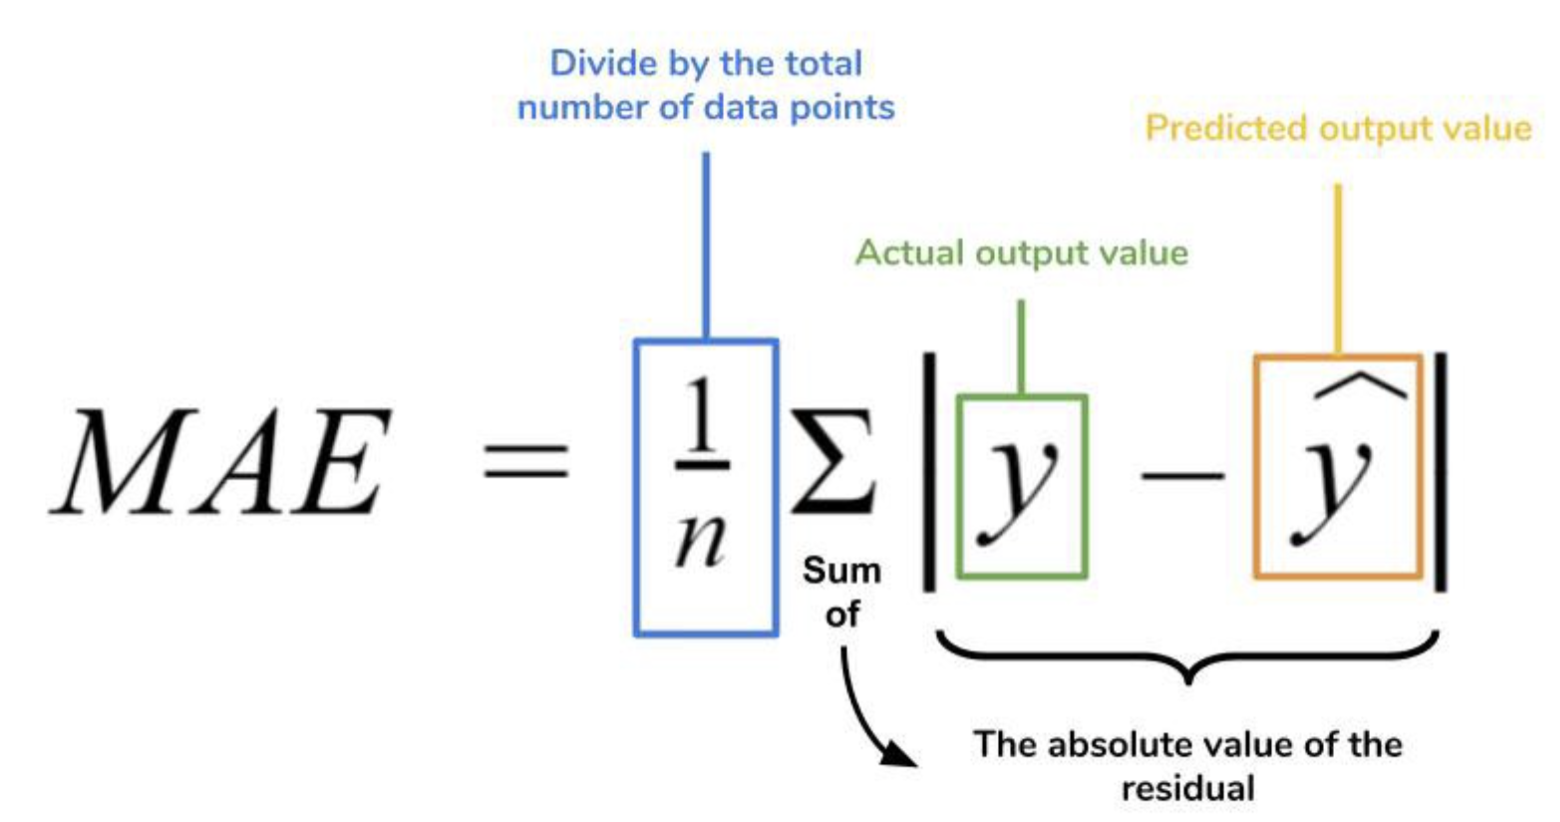

In [72]:
Image(filename='img/mae.png') 

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [89]:
data_matrix

array([[0., 3., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [90]:
data_matrix_test

array([[5., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
data_matrix_test.shape

(943, 1682)

In [92]:
item_prediction

array([[115.4914122 ,  35.10515846,  22.91211018, ...,   0.        ,
          0.94057039,   0.        ],
       [ 73.7527643 ,  15.29083028,  11.89784905, ...,   0.        ,
          0.41068318,   0.        ],
       [ 28.7384985 ,   6.78198001,   4.745609  , ...,   0.        ,
          0.26058737,   0.        ],
       ...,
       [ 69.47986613,  12.23076401,   9.25426779, ...,   0.        ,
          0.41005349,   0.        ],
       [ 75.2248144 ,  20.56954557,  11.40065483, ...,   0.        ,
          0.60628368,   0.        ],
       [105.166655  ,  34.15296187,  19.72145208, ...,   0.        ,
          1.12177594,   0.        ]])

In [93]:
data_matrix_test[data_matrix_test.nonzero()]

array([5., 4., 5., ..., 4., 4., 3.])

In [94]:
def mae(prediction, ground_truth):

    prediction = prediction[ground_truth.nonzero()]
    
    ground_truth = ground_truth[ground_truth.nonzero()]
    
    return mean_absolute_error(prediction, ground_truth)

In [95]:
mae(item_prediction,data_matrix_test)

37.5278583538027

## RMSE: Root Mean Squared Error

### Formula:

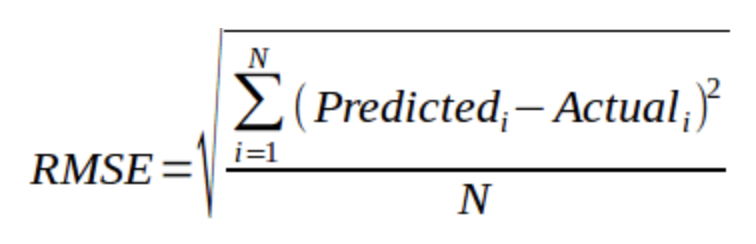

In [96]:
Image(filename='img/rmse.png') 

In [97]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [98]:
rmse(item_prediction,data_matrix_test)

47.44343902559059

In [99]:
item_prediction

array([[115.4914122 ,  35.10515846,  22.91211018, ...,   0.        ,
          0.94057039,   0.        ],
       [ 73.7527643 ,  15.29083028,  11.89784905, ...,   0.        ,
          0.41068318,   0.        ],
       [ 28.7384985 ,   6.78198001,   4.745609  , ...,   0.        ,
          0.26058737,   0.        ],
       ...,
       [ 69.47986613,  12.23076401,   9.25426779, ...,   0.        ,
          0.41005349,   0.        ],
       [ 75.2248144 ,  20.56954557,  11.40065483, ...,   0.        ,
          0.60628368,   0.        ],
       [105.166655  ,  34.15296187,  19.72145208, ...,   0.        ,
          1.12177594,   0.        ]])

## Precision

How precise(accurate) is the model prediction

Out of all the recommended items, how many did the user actually like?

Assume out of 10 recommended items, user liked only 7, i.e. Precision = 70%

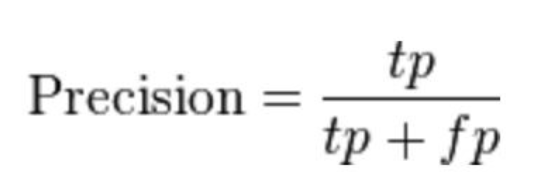

In [100]:
Image(filename='img/precision.png') 

## Recall

In the model prediction, how many items which user liked are captured

If user likes 10 items, but recommendtion engine is able to capture only 3 out of them, recall = 30%

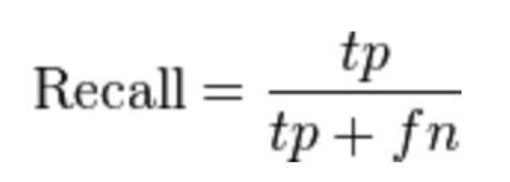

In [101]:
Image(filename='img/recall.png') 

## Precision Recall Trade Off 

Ideally we want precision & recall both 100%

If we simply recommend all the items, they will definitely cover the items which the user likes. <br>So we have 100% recall! But think about precision for a second. If we recommend say 1000 items and user likes only 10 of them, then precision is 0.1%.<br> This is really low. So, our aim should be to maximize both precision and recall

## Precision@K & Recall@K

In Case of Recommendation system, we want to recommend top N items to user.<br>   But by simply calculating Precision & Recall, we're missing on top N item accuracy part, since precision recall is calculated by taking all items into account. <br>  

To capture the top ordering into evaluation, cutoff K is used in Precision & Recall. <br> Here K is taking top K recommendations & doing evalaution only for this cutoff K items. <br> if k=10, Precision@10 will take only top 10 recommendations & using this we find out Precision, recall. 

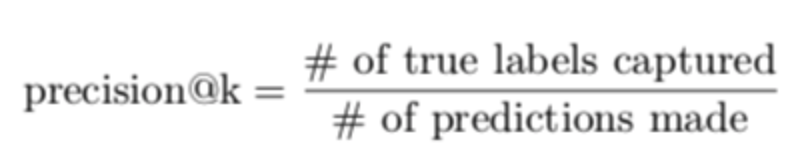

In [102]:
Image(filename='img/precision_k.png') 

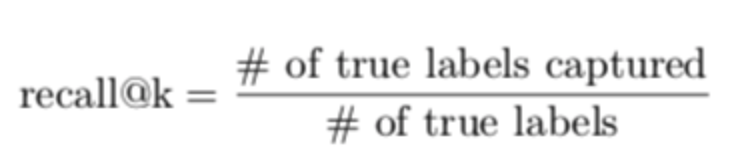

In [103]:
Image(filename='img/recall_k.png') 

## MAP@K: Mean Average Precision at K

taking average of Precision at value from 1 to K

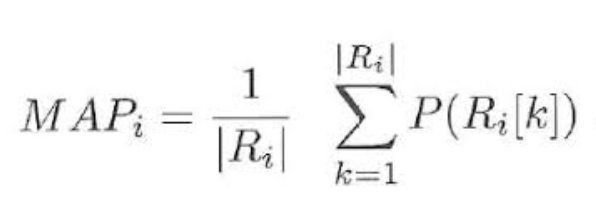

In [104]:
Image(filename='img/map.png') 

## Hit Rate

hit rate: if a user liked one of the top-10 we recommended, we consider it is a “hit”.

The process of compute hit rate for a single user:<br>
Leave-One-Out cross-validation<br>
1. Find all items in this user’s history in the training data.<br>
2. Intentionally remove one of these items.<br>
3. Use all other items to feed the recommender and ask for top 10 recommendations.<br>
4. If the removed item appear in the top 10 recommendations, it is a hit. If not, it’s not a hit.<br>

## When to use:

if you've to compare all ratings data for evaluation:<br>
    then the evaluation metrics should be RMSE or MAE<br>
else in case of Top N rankings data:<br>
    focus on Precision@K, MAP@K etc for evaluation<br>

# Precision@K 

In [105]:
pred_set = merged['movie_id'].values[:10]

In [107]:
pred_set

array([ 49,  99,  97, 180, 173,  55, 126,   6, 182, 171])

In [108]:
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [109]:
ratings[(ratings['user_id']==117) & (ratings['rating']>3)].sort_values(by='rating',ascending=False).shape

(57, 3)

In [111]:
ratings[(ratings['user_id']==117) & (ratings['rating']>3)].sort_values(by='rating',ascending=False).head(10)

,user_id,movie_id,rating
14681,117,117,5
11143,117,307,5
12893,117,56,5
13043,117,886,5
13463,117,195,5
654,117,268,5
14763,117,214,5
14894,117,313,5
16534,117,222,5
18631,117,257,5


In [112]:
ratings_filtered = ratings[(ratings['user_id']==117) & (ratings['rating']>3)].sort_values(by='rating',ascending=False)

In [113]:
ratings_filtered.head()

,user_id,movie_id,rating
14681,117,117,5
11143,117,307,5
12893,117,56,5
13043,117,886,5
13463,117,195,5


In [114]:
relevant_set = ratings_filtered['movie_id'].values

In [115]:
relevant_set

array([ 117,  307,   56,  886,  195,  268,  214,  313,  222,  257,  298,
        179,  172,  763,  173,   96,   11,  475,  164,  628,  282,  421,
        405,  181, 1016,   15,   12,  751,  176,   50,  168,  109,  210,
        423,  156,  151,  265,    1,  132,  249,  271,  144,  174,  789,
        678,   98,  237,   33,   25, 1012,  597,  121,  258,  358,  742,
        772,  150])

In [116]:
ratings_filtered['movie_id'].nunique()

57

In [117]:
relevant_set

array([ 117,  307,   56,  886,  195,  268,  214,  313,  222,  257,  298,
        179,  172,  763,  173,   96,   11,  475,  164,  628,  282,  421,
        405,  181, 1016,   15,   12,  751,  176,   50,  168,  109,  210,
        423,  156,  151,  265,    1,  132,  249,  271,  144,  174,  789,
        678,   98,  237,   33,   25, 1012,  597,  121,  258,  358,  742,
        772,  150])

In [118]:
pred_set

array([ 49,  99,  97, 180, 173,  55, 126,   6, 182, 171])

In [119]:
len(relevant_set)

57

In [120]:
list(set(relevant_set) & set(pred_set)) 

[173]

In [121]:
len(list(set(relevant_set) & set(pred_set)))

1

In [ ]:
#set(relevant_set).intersection(pred_set) 

In [122]:
precision_at_10 = len(list(set(relevant_set) & set(pred_set)))/10

In [123]:
precision_at_10

0.1

# Global Average Precision@K

In [124]:
user_index=117

In [125]:
user_relevant_set = ratings[(ratings['user_id']==user_index) & (ratings['rating']>3)].sort_values(by='rating',ascending=False)['movie_id'].tolist()

In [126]:
user_relevant_set

[117,
 307,
 56,
 886,
 195,
 268,
 214,
 313,
 222,
 257,
 298,
 179,
 172,
 763,
 173,
 96,
 11,
 475,
 164,
 628,
 282,
 421,
 405,
 181,
 1016,
 15,
 12,
 751,
 176,
 50,
 168,
 109,
 210,
 423,
 156,
 151,
 265,
 1,
 132,
 249,
 271,
 144,
 174,
 789,
 678,
 98,
 237,
 33,
 25,
 1012,
 597,
 121,
 258,
 358,
 742,
 772,
 150]

In [127]:
user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()

In [128]:
user_predicted_set

[49, 99, 97, 180, 173, 55, 126, 6, 182, 171]

In [129]:
len(list(set(user_relevant_set) & set(user_predicted_set)))

1

In [130]:
ratings['user_id'].nunique()

943

## Modularize the code

In [131]:
global_precision = 0

In [132]:
for user_index in range(0,943):
    user_relevant_set = ratings[(ratings['user_id']==user_index) & (ratings['rating']>3)].sort_values(by='rating',ascending=False)['movie_id'].tolist()
    user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    print(precision_at_10)
    global_precision = global_precision + precision_at_10


0.0
0.2
0.5
0.0
0.0
0.1
0.2
0.5
0.1
0.0
0.3
0.2
0.2
0.5
0.1
0.0
0.3
0.1
0.4
0.0
0.0
0.0
0.2
0.3
0.4
0.1
0.0
0.0
0.0
0.1
0.1
0.1
0.2
0.0
0.2
0.0
0.0
0.1
0.0
0.0
0.0
0.2
0.3
0.5
0.2
0.1
0.1
0.0
0.0
0.1
0.0
0.1
0.1
0.1
0.1
0.0
0.1
0.2
0.2
0.6
0.1
0.0
0.2
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.3
0.0
0.3
0.2
0.0
0.0
0.1
0.0
0.2
0.0
0.0
0.0
0.2
0.0
0.0
0.2
0.0
0.0
0.0
0.3
0.2
0.1
0.2
0.0
0.7
0.5
0.0
0.1
0.0
0.0
0.0
0.1
0.0
0.0
0.2
0.0
0.1
0.0
0.0
0.2
0.0
0.1
0.1
0.1
0.0
0.0
0.1
0.1
0.1
0.2
0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.5
0.1
0.1
0.0
0.0
0.1
0.0
0.1
0.0
0.1
0.0
0.0
0.0
0.0
0.5
0.6
0.0
0.0
0.0
0.0
0.0
0.2
0.3
0.0
0.0
0.0
0.1
0.0
0.1
0.1
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.1
0.1
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.1
0.4
0.0
0.0
0.0
0.0
0.1
0.1
0.0
0.2
0.1
0.3
0.2
0.0
0.0
0.1
0.0
0.1
0.1
0.1
0.0
0.0
0.0
0.3
0.2
0.0
0.0
0.1
0.0
0.0
0.1
0.0
0.0
0.5
0.2
0.0
0.5
0.3
0.1
0.1
0.0
0.1
0.0
0.0
0.4
0.1
0.2
0.1
0.1
0.1
0.2
0.0
0.0
0.0
0.1
0.1
0.4
0.1
0.0
0.1
0.1
0.1
0.0
0.1
0.0
0.0
0.0
0.1
0.0
0.2
0.1
0.1
0.2


In [133]:
global_precision

102.29999999999957

In [134]:
ratings['user_id'].nunique()

943

In [135]:
global_average_precision = global_precision/ratings['user_id'].nunique()

In [136]:
global_average_precision

0.10848356309650008

### Don't recommend movies which user has already seen 

In [137]:
df_user = pd.DataFrame(data_matrix_full[117], columns=['rating'])

In [138]:
df_user.head(10)

,rating
0,0.0
1,0.0
2,0.0
3,0.0
4,2.0
5,0.0
6,5.0
7,0.0
8,0.0
9,0.0


In [139]:
df_user = df_user.reset_index()

In [140]:
df_user.head()

,index,rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,2.0


In [141]:
df_user.columns = ['movie_id', 'rating']

In [142]:
df_user.head()

,movie_id,rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,2.0


In [143]:
df_user['rating'].value_counts()

0.0    1611
5.0      55
4.0      11
3.0       3
1.0       1
2.0       1
Name: rating, dtype: int64

In [144]:
df_user.shape

(1682, 2)

In [145]:
1682-1611

71

### Filter already watched movies from the global result list 

In [146]:
merged_collab = pd.merge(merged, df_user, on='movie_id', how='left')

In [147]:
merged_collab.head()

,movie_id,score,movie title,rating
0,49,99.102508,I.Q. (1994),0.0
1,99,93.800499,Snow White and the Seven Dwarfs (1937),5.0
2,97,88.091699,Dances with Wolves (1990),5.0
3,180,86.148372,Apocalypse Now (1979),0.0
4,173,80.003919,"Princess Bride, The (1987)",5.0


In [148]:
merged_collab.shape

(1682, 4)

In [153]:
merged_collab = merged_collab.drop(merged_collab[merged_collab['rating']>0].index)

In [154]:
merged_collab.head()

,movie_id,score,movie title,rating
0,49,99.102508,I.Q. (1994),0.0
3,180,86.148372,Apocalypse Now (1979),0.0
6,126,69.090818,"Spitfire Grill, The (1996)",0.0
8,182,67.370384,GoodFellas (1990),0.0
12,0,64.571594,NaN,0.0


In [155]:
merged_collab.shape

(1611, 4)

In [156]:
merged_collab['movie title'][:10]

0                    I.Q. (1994)
3          Apocalypse Now (1979)
6     Spitfire Grill, The (1996)
8              GoodFellas (1990)
12                           NaN
13        Field of Dreams (1989)
14             Unforgiven (1992)
15                Aladdin (1992)
16      Santa Clause, The (1994)
17            Client, The (1994)
Name: movie title, dtype: object